In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
# read in dataset
df = pd.read_csv("suicide_rates.csv")
print(f'#rows: {len(df)}   #columns: {len(df.columns)}')

#rows: 27820   #columns: 12


In [3]:
# check columns
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
# check data types
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
# check NaN
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
# drop 'HDI for year' since 19,456 / 27,820 instancs have NaN. This results in a sparse dataset.
# Imputing a mean for the missing values would most likely be inaccurate as this dataset spans a variety of dates and demographics

# also drop 'country-year' because it is a derived feature and does not add to the training performance
df.drop(columns=['HDI for year', 'country-year'], inplace=True)

In [8]:
# remove leading space from ' gdp_for_year ($)' feature title
# convert 'gdp_for_year ($)' from string to numerical integer
def to_int(x):
    x = x.replace(',','')
    return int(x)

df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)

df['gdp_for_year ($)'] = df['gdp_for_year ($)'].apply(to_int)

In [9]:
# one-hot-encode nominal features
_df = pd.get_dummies(df, prefix='', prefix_sep='')

In [10]:
_df.head()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),Albania,Antigua and Barbuda,Argentina,Armenia,...,35-54 years,5-14 years,55-74 years,75+ years,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,1987,21,312900,6.71,2156624900,796,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,2156624900,796,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,2156624900,796,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,2156624900,796,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1987,9,274300,3.28,2156624900,796,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
# shift column order with dependent variable as first column
dependent = _df.pop('suicides/100k pop')
_df['suicides/100k pop'] = dependent

dependent = df.pop('suicides/100k pop')
df['suicides/100k pop'] = dependent

In [12]:
# scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
#scaler = MinMaxScaler()
scaler = MinMaxScaler()
_df = pd.DataFrame(scaler.fit_transform(_df), columns=_df.columns)

In [14]:
for col in _df.columns:
    _df[col] = _df[col].astype('float')

In [15]:
# confirm preprocessed dtypes are all numerical
_df.dtypes

year                  float64
suicides_no           float64
population            float64
gdp_for_year ($)      float64
gdp_per_capita ($)    float64
                       ...   
Generation X          float64
Generation Z          float64
Millenials            float64
Silent                float64
suicides/100k pop     float64
Length: 121, dtype: object

In [16]:
_df.head(2)

,year,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,...,5-14 years,55-74 years,75+ years,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,suicides/100k pop
0,0.064516,0.000940,0.007137,0.000116,0.004322,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.029826
1,0.064516,0.000716,0.007025,0.000116,0.004322,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.023070


# Problem #1

In [17]:
# get predictors and dependent variable
X = _df.iloc[:,:-1].values
y = _df.iloc[:,-1].values

In [18]:
import random
from sklearn.model_selection import KFold

In [19]:
# Linear Regression Model

class LinearRegression():
    
    def __init__(self, learning_rate=0.001, n_iter=20):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = []
        
    
    def fit(self, _X, _y):
        # initialize random weights
        self.weights = np.array([round(random.random(), 3) for i in range(1 + _X.shape[1])])

        self.costs = []
        
        for i in range(self.n_iter):
            # calculate y_pred for all instances
            y_preds = self.net_input(_X)
            
            # calculate error
            errors = _y - y_preds
            
            # update weights via batch gradient descent
            self.weights[1:] += self.learning_rate * _X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            
            # calculate MSE
            # MSE = 0.5 * ((errors**2).sum()) / _X.shape[0]
            # self.costs.append(MSE)
            
            # calculate SSE
            # SSE = (errors**2).sum() / 2
            # self.costs.append(SSE)
            
            # calculate MAE
            MAE = (np.abs(errors)).sum() / _X.shape[0]
            self.costs.append(MAE)
            
    
    def net_input(self, _X):
        # calculate y_pred for all instances in _X
        return np.dot(_X, self.weights[1:]) + self.weights[0]

    
    def predict(self, _X):
        return self.net_input(_X)
    
    
    def get_weights(self):
        return self.weights

In [20]:
# 10-fold CV Linear Regression

def LinearRegressionCV(_X, _y, model):
    kf = KFold(n_splits=10, shuffle=True)
    
    costs = []
    
    # initiate 10-fold CV
    for train_index, test_index in kf.split(_X):
        x_train = _X[train_index]
        y_train = _y[train_index]
        
        x_test = _X[test_index]
        y_test = _y[test_index]
        
        # train model
        lr = model
        lr.fit(x_train, y_train)
        
        # predict on validation set
        y_pred = lr.predict(x_test)
        
        # calculate Mean Absolute Error
        MAE = np.abs(y_test - y_pred).sum() / y_test.shape[0]
        
        costs.append(MAE)
    
    print(f'Average MAE: {np.mean(costs):.3f} {chr(177)} {np.std(costs):.3f}')

In [21]:
def MAE(y_pred, y):
    return np.abs(y - y_pred).sum() / y.shape[0]

In [22]:
def MSE(y_pred, y):
    return 0.5 * ((y_pred - y)**2).sum() / y.shape[0]

In [23]:
# observe 10-fold CV Performance
LinearRegressionCV(X, y, LinearRegression(learning_rate=0.00001, n_iter=10))

Average MAE: 0.322 ± 0.016


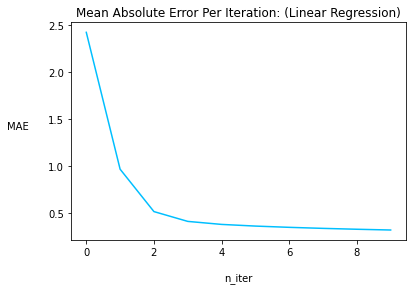

In [24]:
# train linear regression model
lr = LinearRegression(learning_rate=0.00001, n_iter=10)

lr.fit(X,y)

# observe cost per iteration of batch gradient descent
plt.plot(range(len(lr.costs)), lr.costs, color='deepskyblue')

plt.title('Mean Absolute Error Per Iteration: (Linear Regression)')
plt.xlabel('n_iter', labelpad=15)
plt.ylabel('MAE', rotation='horizontal', labelpad=30)

plt.show()

In [25]:
# filter dataset for: 'age'=20, 'male', 'generation X'
_df1 = _df[(_df['15-24 years']==1) & (_df['male']==1) & (_df['Generation X']==1)]

X = _df1.iloc[:,:-1]
y = _df1.iloc[:,-1]

In [26]:
X.shape

(1057, 120)

In [27]:
# predict on selected data
y_pred = lr.predict(X)

In [28]:
# calculate MAE
error = MAE(y, y_pred)
print(f'MAE for 20 years, male, Gen X: {error:.3f}')

MAE for 20 years, male, Gen X: 0.268


In [29]:
# coefficients
coef = lr.get_weights()
len(coef)

121

Including the bias term, there are **121 coefficients**, 120 which each corresponds to a feature in the dataset after one-hot-encoding

# Problem #2

In [30]:
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation,suicides/100k pop
0,Albania,1987,male,15-24 years,21,312900,2156624900,796,Generation X,6.71
1,Albania,1987,male,35-54 years,16,308000,2156624900,796,Silent,5.19
2,Albania,1987,female,15-24 years,14,289700,2156624900,796,Generation X,4.83
3,Albania,1987,male,75+ years,1,21800,2156624900,796,G.I. Generation,4.59
4,Albania,1987,male,25-34 years,9,274300,2156624900,796,Boomers,3.28


In [31]:
# check data types
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
suicides/100k pop     float64
dtype: object

In [32]:
__df = df.copy()

In [33]:
# Numerically encode nominal features
def to_numerical(df):
    # iterate each column
    for col in df.columns:
        # check if column is non-numerical
        if df[col].dtype == np.object:
            
            # get list of all unique values in column
            unique_list = df[col].unique()
            
            # encode based on value's index in unique_list
            for i in range(len(unique_list)):
                df[col] = df[col].replace(unique_list[i], i)

In [34]:
# observe feature values' index position when calling df[col].unique()
# indices of feature values will be used to filtering out isntances in later part of problem

print(f'age: {list(__df["age"].unique())}')
print(f'sex: {list(__df["sex"].unique())}')
print(f'generation: {list(__df["generation"].unique())}')

age: ['15-24 years', '35-54 years', '75+ years', '25-34 years', '55-74 years', '5-14 years']
sex: ['male', 'female']
generation: ['Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z']


In [35]:
# convert data
to_numerical(__df)

In [36]:
# see new dataset
__df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation,suicides/100k pop
0,0,1987,0,0,21,312900,2156624900,796,0,6.71
1,0,1987,0,1,16,308000,2156624900,796,1,5.19
2,0,1987,1,0,14,289700,2156624900,796,0,4.83
3,0,1987,0,2,1,21800,2156624900,796,2,4.59
4,0,1987,0,3,9,274300,2156624900,796,3,3.28


In [37]:
# rescale some features

__df['gdp_for_year ($)'] = __df['gdp_for_year ($)'] / 100000000
__df['gdp_per_capita ($)'] = __df['gdp_per_capita ($)'] / 10
__df['population'] = __df['population'] / 10000

In [38]:
__df.head(2)

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation,suicides/100k pop
0,0,1987,0,0,21,31.29,21.566249,79.6,0,6.71
1,0,1987,0,1,16,30.80,21.566249,79.6,1,5.19


In [39]:
X = __df.iloc[:,:-1].values
y = __df.iloc[:,-1].values

In [40]:
# train new regression model
lr = LinearRegression(learning_rate=0.00001, n_iter=10)

lr.fit(X, y)

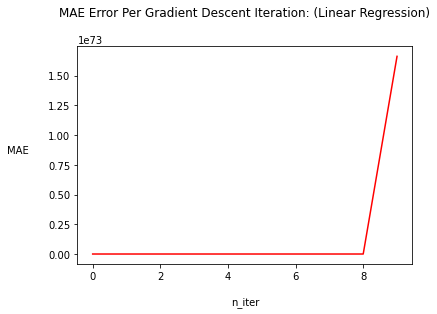

In [41]:
# plot MAE error per iteration
plt.plot(range(len(lr.costs)), lr.costs, color='r')

plt.title('MAE Error Per Gradient Descent Iteration: (Linear Regression)', pad=30)
plt.xlabel('n_iter', labelpad=15)
plt.ylabel('MAE', rotation='horizontal', labelpad=30)

plt.show()

Using the same **learning_rate=0.00001** and **n_iter=10**, we see that gradient descent optimization of the error does not converge. This occurs because the learning rate is too small in addition with too few iterations for this version of the dataset.

Per the directions, we did not one-hot-encode the nominal features, but simply converted them to numerical values. Furthermore, I kept the dataset unnormalized, except for reducing 'gdp_per_capita', 'gdp_for_year', and 'population' by several factors of 10 so that the gradient descent algorithm would have a chance of converging with the given learning rate as the other features' values are only on the order of 10-100.

With the model as is, predicting on the desired values will yield an extremely high error. This is shown below:

In [42]:
# filter dataset for: 'age'=20, 'male', 'generation X'
_df2 = __df[(__df['age']==0) & (__df['sex']==0) & (__df['generation']==0)]

X = _df2.iloc[:,:-1]
y = _df2.iloc[:,-1]

In [43]:
# predict on selected data
y_pred = lr.predict(X)

In [44]:
# calculate MAE
error = MAE(y, y_pred)
print(f'MAE for 20 years, male, Gen X: {error:.3f}')

MAE for 20 years, male, Gen X: 786534992004895195261523986743741704561617844022958483006810261440079052054462464.000


As expected, we get an enormous error. By not scaling the dataset across all features, it is hard for converge on coefficients that would minimize the error. In addition, numerically encoding the nominal features vs one-hot-encoding adds error the training in that it gives a false ordinality to the nominal values. However, a potential positive in witholding one-hot-encoding is that the feature space is kept to a minimum.

In [45]:
# scale dataset across all features with numerically transformed nominal features
scaler = MinMaxScaler()
_df2 = pd.DataFrame(scaler.fit_transform(_df2), columns=_df2.columns)

In [46]:
# observe new dataset
_df2.head(2)

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation,suicides/100k pop
0,0.0,0.133333,0.0,0.0,0.003192,0.015514,0.000205,0.009689,0.0,0.078397
1,0.0,0.200000,0.0,0.0,0.002584,0.015828,0.000202,0.009209,0.0,0.062274


In [47]:
# train on new data
lr = LinearRegression(learning_rate=0.00001, n_iter=10)

lr.fit(X, y)

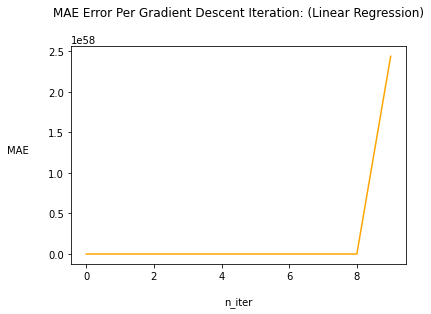

In [48]:
# plot MAE error per iteration
plt.plot(range(len(lr.costs)), lr.costs, color='orange')

plt.title('MAE Error Per Gradient Descent Iteration: (Linear Regression)', pad=30)
plt.xlabel('n_iter', labelpad=15)
plt.ylabel('MAE', rotation='horizontal', labelpad=30)

plt.show()

Even after scaling all features, with the same **learning_rate** and **n_iter**, the resulting weights fail to cause the error to converge on a minimum. The difference between this training instance and that in Problem #1 is that the nominal features were numerically transformed (obtaining an ordinal nature) vs one-hot-encoding. Thus, it is for this reason that we observe such error.

In [49]:
# coefficients
coef = lr.get_weights()
len(coef)

10

Including the bias term, there are **10 coefficients**, 9 which each corresponds to a feature in the dataset after one-hot-encoding

# Problem #3

As mentioned in the comments above, the model in problem #2 performed much worse than that in problem #1. Numerically transforming the nominal features rather than one-hot-encode increases the range of values for the affected features in the feature space. With or without scaling all features, the error cannot converge unless an extremely small learning step is implemented along with a high number of iterations.

It is important to note that the metric used for gradient descent implementation of linear regression was MAE. If a different metric was used, then perhaps a difference in performance can be observed.

# Problem #4

In [50]:
# read in dataset
df = pd.read_csv("suicide_rates.csv")
print(f'#rows: {len(df)}   #columns: {len(df.columns)}')

#rows: 27820   #columns: 12


In [51]:
# filter dataset for: 'age'=33, 'male', 'generation Alpha'
print(f'Generations: {df.generation.unique()}')

df.generation.isin(['Alpha', 'A']).any()

Generations: ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


False

For the feature *'generation'*, the value *'Alpha'* does not exist in the original dataset. Since we one-hot-encoded the *'generation'* feature, the model won't recognize the 'Alpha' generation value since it was not part of the encoding process. Thus, predicting on an instance with this feature value is not possible as the computer cannot understand it.

We can add the instance to the training data and retrain the model after re-encoding the 'generation' feature. However, we would only have 1 instance among all the other training samples with the 'Alpha' value. This would still allow the model to predict for any instances of 'Alpha' class, but it would not generalize well as there was only 1 instance in the training data.

# Problem #5

Regression does not have a restriction on weather feature values are continuous, binary, or discrete. The values of a feature is easily interpretable in relation to that feature's weight. For example, assuming all M-1 weights are the same, then any values of feature M can be understood to change proprotional to M's weight value.

# Problem #6

Numerical values may be better representative of nominal features have have ordinality to them. For example, Kings > Queen > Jacks : 3 > 2 > 1.

Furthermore, one-hot-encoding causes an increase in feature space. For a feature with a large number of classes, one-hot-encoding can cause the feature space to grow too large, leading to to the curse of dimensionality. Optimization problems in a large feature space becomes increasingly difficult in such a case.

# Problem #7

Maintaining that the dependent variable is still the numerical 'suicides/100k pop', I would suggest regression. The values for this feature are not strictly discrete, unlike that of a feature with class labels.

The values of 'suicides/100k pop' are continuous, and thus regression would be better suited.